<a href="https://colab.research.google.com/github/JuanCastrillonL/Data-Integration-Analytics/blob/main/6_L%C3%B3gica_Borrosa_Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se procede con la carga de los datos

Los clusters son:
 [[ 6.17984694 17.20535714 27.42467949 38.52183908 51.41522491]]
Las cualidades son:
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
La base de los conjuntos es:
 [[27.46192822 19.19279556 16.63796498 19.41225488 29.08229425]]
Los clusters de severidad son:
 [[ 3.13318373  8.57540888 17.14839968 33.55760506 55.19521753]]
Las cualidades de la severidad son:
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
La base de los conjuntos de severidad son:
 [[25.48597406 21.40430519 19.26105749 23.36335884 39.59156819]]


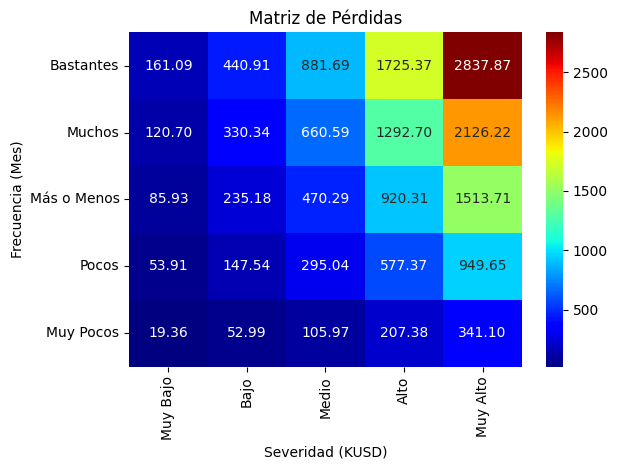

In [ ]:
nxl='/content/drive/MyDrive/BUSINESS INTELLIGENCE/Integración de datos y prospectiva/7. LógicaBorrosa_EVERGREEEN.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=np.array(XDB[['Eventos (Mes)','Severidad (KUSD)']])
#print(XDB) #Aquí se definen las variables de trabajo

#'''''''''''''''''''''''''''''''''''''''''''''''''''''''
#Se inicia el proceso de clusterización de las variables
#'''''''''''''''''''''''''''''''''''''''''''''''''''''''
np.random.seed(42)
NC=5 #Número de cualidades por variable lingüísticas

#1. Se procede con la clusterización de los Eventos (Frecuencia (Mes))
from sklearn.cluster import KMeans

mkmf=KMeans(n_clusters=NC,init='random',random_state=42)
mkmf.fit(XDB[:,0].reshape(-1,1))
XCf=mkmf.cluster_centers_
XCf=np.array(sorted(XCf))
print("Los clusters son:\n",XCf.T)
lbf=['Muy Pocos','Pocos','Más o Menos','Muchos','Bastantes'] #Label clusters
print("Las cualidades son:\n",lbf)

#Se busca la base de cada conjunto borroso (Valor de Pertenencia)
sigmaf=np.zeros((NC,1))

for j in range(NC):
  sigmaf[j,]=np.sum(np.abs(XCf-XCf[j]))/4

print("La base de los conjuntos es:\n",sigmaf.T)

#2. Se hace la clusterización de la Severidad (Gasto Promedio por Evento)
mkms=KMeans(n_clusters=NC,init='random',random_state=42)
mkms.fit(XDB[:,1].reshape(-1,1))
XCs=mkms.cluster_centers_
XCs=np.array(sorted(XCs))
print("Los clusters de severidad son:\n",XCs.T)
lbs=['Muy Bajo','Bajo','Medio','Alto','Muy Alto'] #Label clusters
print("Las cualidades de la severidad son:\n",lbs)

#Se busca la base de cada conjunto borroso (Valor de Pertenencia)
sigmas=np.zeros((NC,1))

for j in range(NC):
  sigmas[j,]=np.sum(np.abs(XCs-XCs[j]))/4

print("La base de los conjuntos de severidad son:\n",sigmas.T)

#3. Se procede con la obtención del mapa de pérdidas - Matriz de Pérdidas
MP = np.outer(XCf, XCs)

# Invertir el orden de las filas para que las frecuencias altas estén arriba
MP_ordenada = MP[::-1, :]  # Inversión vertical

# Reorganizar también las etiquetas de frecuencia en el mismo orden
lbf_ordenada = lbf[::-1]

# Graficar la matriz de pérdidas
plt.figure()
sns.heatmap(MP_ordenada, annot=True, cmap='jet', fmt='.2f')
plt.title('Matriz de Pérdidas')
plt.ylabel('Frecuencia (Mes)')
plt.xlabel('Severidad (KUSD)')
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
plt.tight_layout()
plt.show()

2. Esto esta destinado para el calculo de los valores de pertenencia de Frecuencia y Severidad

Número de contenedores en tierra: 5
Los labels de frecuencia son:
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
La valores de pertenencia a los conjuntos borrosos son:
 [[0.99907752 0.81692644 0.4032152  0.22515044 0.279822  ]]
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Pérdida Promedio de Contenedores en Tierra: 20
Los labels de Severidad son:
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
La valores de pertenencia a los conjuntos borrosos son:
 [[0.80332591 0.86723472 0.98910043 0.84504089 0.67359743]]


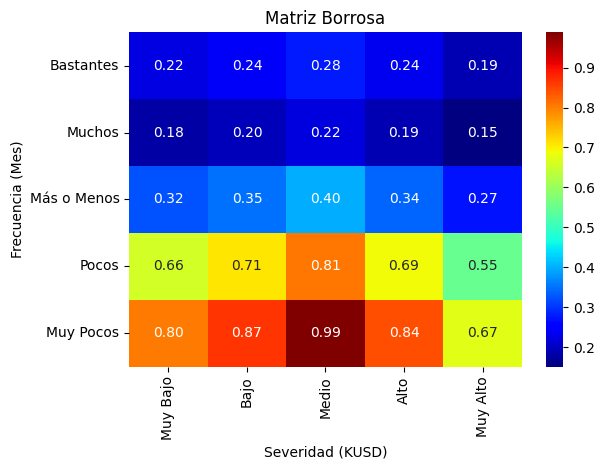

El valor orignal es: 100
El valor borroso estimado: 160.86121784504775


In [ ]:
#3. Se evalua un solo valor de  Frecuencia y Severidad
Xf=5
VPf=np.exp(-0.5*((XCf-Xf)/sigmaf)**2)
print("Número de contenedores en tierra:",Xf)
print("Los labels de frecuencia son:\n",lbf)
print("La valores de pertenencia a los conjuntos borrosos son:\n",VPf.T)
print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")
Xs=20
VPs=np.exp(-0.5*((XCs-Xs)/sigmas)**2)
print("Pérdida Promedio de Contenedores en Tierra:",Xs)
print("Los labels de Severidad son:\n",lbs)
print("La valores de pertenencia a los conjuntos borrosos son:\n",VPs.T)

#Se procede con la construcción de la matriz de pertenencia - matriz borrosa
MB=np.outer(VPf, VPs);
MB_ordenada = MB[::-1, :]  # Inversión vertical
lbf_ordenada = lbf[::-1]

# Graficar la matriz de pérdidas
plt.figure()
sns.heatmap(MB_ordenada, annot=True, cmap='jet', fmt='.2f')
plt.title('Matriz Borrosa')
plt.ylabel('Frecuencia (Mes)')
plt.xlabel('Severidad (KUSD)')
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
plt.tight_layout()
plt.show()

#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#Se procede a determinar los mayores valores de pértenencia
VMB=np.array(sorted(MB.flatten(),reverse=True))
MT=np.zeros((5,5))

for i in range(4):
    MT[np.where(MB==VMB[i])]=1

LDAuv=np.sum(MB*MP*MT)/np.sum(MB*MT)

print("El valor orignal es:",Xf*Xs)
print("El valor borroso estimado:",LDAuv)

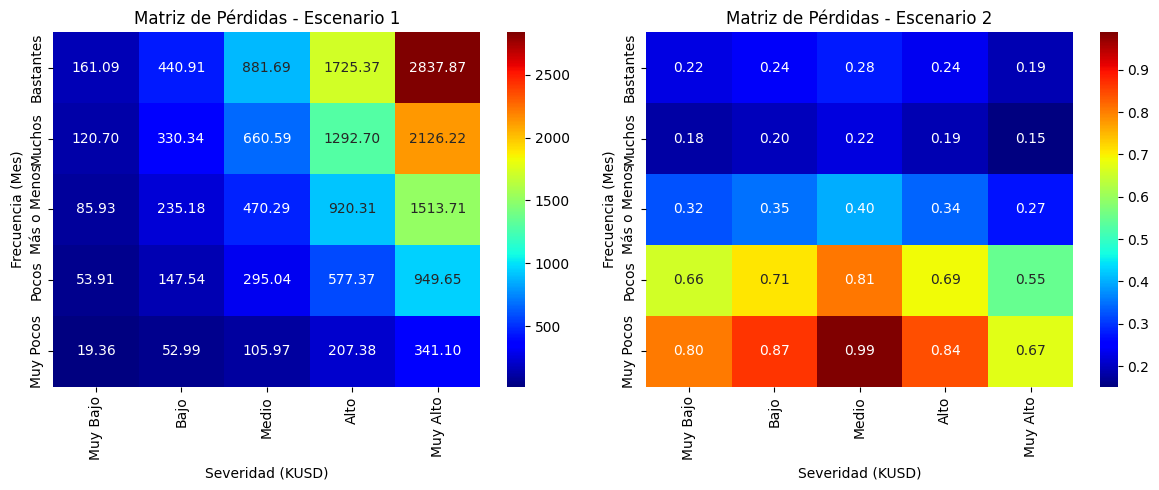

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primer heatmap
sns.heatmap(MP_ordenada, annot=True, cmap='jet', fmt='.2f', ax=axes[0])
axes[0].set_title('Matriz de Pérdidas - Escenario 1')
axes[0].set_ylabel('Frecuencia (Mes)')
axes[0].set_xlabel('Severidad (KUSD)')
axes[0].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
axes[0].set_yticklabels(lbf_ordenada)
axes[0].set_xticks(np.arange(len(lbs)) + 0.5)
axes[0].set_xticklabels(lbs, rotation=90)

# Segundo heatmap
sns.heatmap(MB_ordenada, annot=True, cmap='jet', fmt='.2f', ax=axes[1])
axes[1].set_title('Matriz de Pérdidas - Escenario 2')
axes[1].set_ylabel('Frecuencia (Mes)')
axes[1].set_xlabel('Severidad (KUSD)')
axes[1].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
axes[1].set_yticklabels(lbf_ordenada)
axes[1].set_xticks(np.arange(len(lbs)) + 0.5)
axes[1].set_xticklabels(lbs, rotation=90)

plt.tight_layout()
plt.show()

2x. Se procede con el muestreo de las variables aleatorias

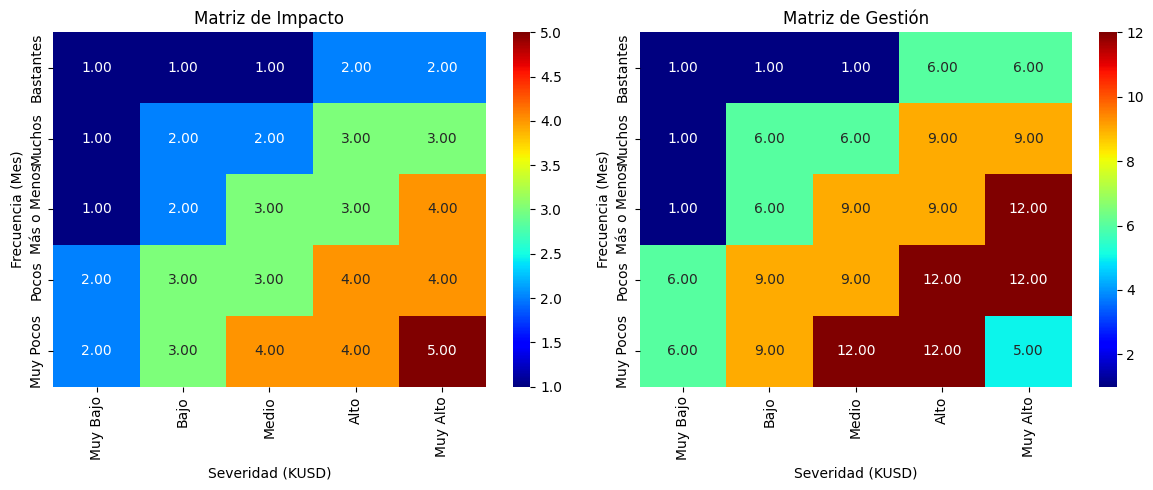

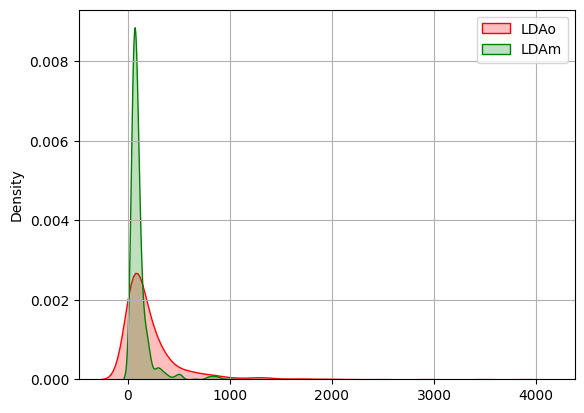

,count,mean,std,min,25%,50%,75%,max,Asimetría
0,1000.0,227.511469,350.442451,3.274402,45.432869,113.882719,261.027030,3894.780915,4.418209
1,1000.0,106.600832,116.978963,46.056846,50.513910,74.511824,102.186281,1002.426506,4.430667


In [ ]:
dff=pd.DataFrame(XDB[:,0])
dfs=pd.DataFrame(XDB[:,1])

Xf=np.array(dff.sample(n=1000))
Xs=np.array(dfs.sample(n=1000))

#Matriz de Impacto
MI=np.array([[1,1,1,2,2],
             [1,2,2,3,3],
             [1,2,3,3,4],
             [2,3,3,4,4],
             [2,3,4,4,5]])

#Matriz de Gestión
NG=3
MG=MI.astype(float).copy()

#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
MG[(MG > 1) & (MG < 5)] *= NG #Yo solamente gestiono riesgo a partir del nivel 3 (Mucho Apetito al Riesgo)
#''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primer heatmap
sns.heatmap(MI, annot=True, cmap='jet', fmt='.2f', ax=axes[0])
axes[0].set_title('Matriz de Impacto')
axes[0].set_ylabel('Frecuencia (Mes)')
axes[0].set_xlabel('Severidad (KUSD)')
axes[0].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
axes[0].set_yticklabels(lbf_ordenada)
axes[0].set_xticks(np.arange(len(lbs)) + 0.5)
axes[0].set_xticklabels(lbs, rotation=90)

# Segundo heatmap
sns.heatmap(MG, annot=True, cmap='jet', fmt='.2f', ax=axes[1])
axes[1].set_title('Matriz de Gestión')
axes[1].set_ylabel('Frecuencia (Mes)')
axes[1].set_xlabel('Severidad (KUSD)')
axes[1].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
axes[1].set_yticklabels(lbf_ordenada)
axes[1].set_xticks(np.arange(len(lbs)) + 0.5)
axes[1].set_xticklabels(lbs, rotation=90)

plt.tight_layout()
plt.show()

#Se procede con la construcción de la distribución agregada
LDAo=np.array(Xf*Xs)
LDAm=np.zeros((len(LDAo)))

#Se procede con la estimacion de las pérdidas utilizando el modelo borroso
for k in range(len(LDAo)):
  #print(Xf[k,],Xs[k,])
  VPf=np.exp(-0.5*((XCf-Xf[k,])/sigmaf)**2)
  VPs=np.exp(-0.5*((XCs-Xs[k,])/sigmas)**2)
  MB=np.outer(VPf, VPs);MB=np.outer(VPf, VPs)

  #Se procede a determinar los mayores valores de pértenencia
  VMB=np.array(sorted(MB.flatten(),reverse=True))
  MT=np.zeros((5,5))

  for i in range(4):
    MT[np.where(MB==VMB[i])]=1

  LDAm[k,]=np.sum(MB*MP*MT*MI)/np.sum(MB*MT*MG)

plt.figure()
sns.kdeplot(x=LDAo.flatten(),fill=True,color='red',label='LDAo')
sns.kdeplot(x=LDAm.flatten(),fill=True,color='green',label='LDAm')
plt.legend()
plt.grid()
plt.show()

#Se propone la caracterización de las distribuciones
from scipy.stats import skew
mo=np.array(pd.DataFrame(LDAo).describe())
mo=np.vstack((mo, skew(LDAo)))
mg2=np.array(pd.DataFrame(LDAm).describe())
mg2=np.vstack((mg2, skew(LDAm)))

dfe=pd.DataFrame(np.row_stack((mo.T, mg2.T)))
dfe.columns=['count','mean','std','min','25%','50%','75%','max','Asimetría']
display(dfe)


**Análisis de resultados**

De acuerdo con lo anterior, la gestión de la matriz de impacto en un nivel 1:2, permitió la disminución general de las pérdidas, lo que se puede observar a tráves del valor medio de las pérdidas (Pérdidas esperadas), la desviación, y el coeficiente el cual aumentó, esto quiere decir que la distribución es más esbelta con menores pérdidas. Es importante decir en qué porcentaje disminuyeron las pérdidas esperadas, así como el porcentaje de cambio de coeficiente de asimetría.

**Integración basada en lógica borrosa**

0. Se cargan los datos externos (Hapag Lloyd)

In [ ]:
nxl2='/content/7. LógicaBorrosa_HAPAG_LLOYD.xlsx'
XDBe=pd.read_excel(nxl2,sheet_name=0)
XDBe=np.array(XDBe[['Eventos (Mes)','Severidad (KUSD)']])

Xfe=np.array(XDBe[:,0]); Xse=np.array(XDBe[:,1])

1. Se procede con la integración de los datos externos

,Muy pocos,Pocos,Más o Menos,Muchos,Bastantes
0,0.982369,0.700151,0.28331,0.154426,0.222556


,Muy Bajo,Bajo,Medio,Alto,Muy Alto
0,0.996408,0.938843,0.702781,0.378066,0.391456


Se procede con la integración del registro:
 1
Se procede con la integración del registro:
 4
Se procede con la integración del registro:
 8
Se procede con la integración del registro:
 10
Se procede con la integración del registro:
 15
Se procede con la integración del registro:
 18
Se procede con la integración del registro:
 20
Se procede con la integración del registro:
 23
Se procede con la integración del registro:
 24
Se procede con la integración del registro:
 26
Se procede con la integración del registro:
 28
Se procede con la integración del registro:
 32
Se procede con la integración del registro:
 35
Se procede con la integración del registro:
 39
Se procede con la integración del registro:
 40
Se procede con la integración del registro:
 44
Se procede con la integración del registro:
 45
Se procede con la integración del registro:
 46
Se procede con la integración del registro:
 47
Se procede con la integración del registro:
 49
Se procede con la integración del registro:

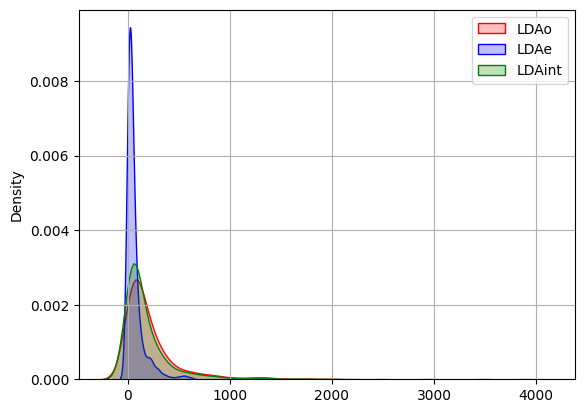

,count,mean,std,min,25%,50%,75%,max,Asimetría,OpVar
0,1000.0,227.511469,350.442451,3.274402,45.432869,113.882719,261.027030,3894.780915,4.418209,5.578594
1,500.0,60.707244,91.712825,0.290069,10.045329,26.403737,66.139836,622.138266,3.154736,0.885352
2,1246.0,192.797094,323.530088,1.189013,32.858995,85.992620,214.990070,3894.780915,4.789007,3.825182


In [ ]:
#Cualidades Internas de la Frecuencia
lbf=['Muy pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
VPf=np.exp(-0.5*((XCf-Xfe[0,])/sigmaf)**2) #Primer Valor de Frecuencia Externa
dffe=pd.DataFrame(VPf.T)
dffe.columns=lbf
display(dffe)

#Cualidades Internas de la Severidad
lbs=['Muy Bajo','Bajo','Medio','Alto','Muy Alto']
VPs=np.exp(-0.5*((XCs-Xse[0,])/sigmas)**2) #Primer Valor de Severidad Externo
dfse=pd.DataFrame(VPs.T)
dfse.columns=lbs
display(dfse)

LDAe=[]; m1=0
#Para todos los datos disponibles
for k in range(len(Xfe)):
  VPf=np.exp(-0.5*((XCf-Xfe[k,])/sigmaf)**2)
  VPs=np.exp(-0.5*((XCs-Xse[k,])/sigmas)**2)
  VPmax=np.max(VPf)*np.max(VPs)

  if VPmax>0.99:
    m1+=1
    print("Se procede con la integración del registro:\n",k)
    LDAe.append(Xfe[k,]*Xse[k,])
print("El número final de datos integrados es:", m1)

#La LDA de integración es la siguiente
LDAe=np.array(LDAe).reshape(-1,1) #Solo Datos Integrados
LDAint=np.vstack((LDAo, np.array(LDAe))) #Base de Datos de Integración
LDAe=Xfe*Xse #Base de Datos Externa

#Se procede a mostrar las gráficas
plt.figure()
sns.kdeplot(x=LDAo.flatten(),fill=True,color='red',label='LDAo')
sns.kdeplot(x=LDAe.flatten(),fill=True,color='blue',label='LDAe')
sns.kdeplot(x=LDAint.flatten(),fill=True,color='green',label='LDAint')
plt.legend()
plt.grid()
plt.show()

#Se procede con el despliegue de la información
mo=np.array(pd.DataFrame(LDAo).describe())
mo=np.vstack((mo, skew(LDAo))); mo=np.vstack((mo, np.percentile(LDAo,0.999)))
me=np.array(pd.DataFrame(LDAe).describe())
me=np.vstack((me, skew(LDAe))); me=np.vstack((me, np.percentile(LDAe,0.999)))
mint=np.array(pd.DataFrame(LDAint).describe())
mint=np.vstack((mint, skew(LDAint))); mint=np.vstack((mint, np.percentile(LDAint,0.999)))

dfe=pd.DataFrame(np.row_stack((mo.T, me.T, mint.T)))
dfe.columns=['count','mean','std','min','25%','50%','75%','max','Asimetría', 'OpVar']
display(dfe)

## **Análisis de Resultados**

Para la integración de los datos, se dispuso de una base de datos de HAPAG LLOYD que posee un total de 500 registros. De ese total el modelo llevo a cabo una integración de 246 datos a un nivel de integración del 99%. Es importante observar de forma general que el coeficiente de asimetría solo tuvo una variación porcentual de tanto ((3.28-3.58)/3.28), lo que muestra la poca variación en la estructura de la distribución de pérdidas. Esto igualmente se puede observar en la poca variación que tuvo la media de las pérdidas a pesar de que la media de las pérdidas era significativamente menor para los datos externos. Es por eso que la variación en la media tuvo un porcentaje pequeño de tanto que se ubicó por debajo del 5% o algo así.